In [ ]:
#########################################################################
#########------- Machine Learning Inmersion ------------#################
#########################################################################
# Capacitador: André Omar Chávez Panduro
# email: andrecp38@gmail.com / andre.chavez@urp.edu.pe
# Introduccion Python - DesarrolloAlgoritmosMachineLearning
# version: 1.0
#########################################################################

## Guía de Modelamiento de Información

#### 1 LIBRERÍAS A UTILIZAR

In [1]:
# Primer Curso de ML
#Importar las librerías necesarias en Python.
import pandas as pd ## Manejo de dataframes o set de datos
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt2 ## Todo lo referente a gráficas y demás.
import matplotlib as plt
import numpy as np ## Todo lo referente a trabajar con vectores y matrices
from scipy import stats ## Herramientas y algoritmos matemáticos para python
import seaborn as sns # Se basa en Matplotlib y la complementa en el tema de graficos y demás.

%matplotlib inline

#### 2 EXTRAYENDO LA DATA

In [110]:
train = pd.read_csv("C:/Users/Andre Chavez/Desktop/Data/train.csv") 
# Leer el dataset en un dataframe usando pandas

In [111]:
# Dimension
train.shape
# Son 614 obs con 13 columnas

(614, 13)

In [112]:
#train.iloc[0:3,[0,1,7]]  # Referencias por indices
#train.loc[train['Gender']=='Male',['Loan_ID','Loan_Status']]

In [113]:
# Consultando los datos y haciendo subconsultas

In [114]:
#train.iloc[['Gender']]

In [115]:
train.iloc[1:12,[1,3,12]]
#train.loc[train['Gender']=='Female',['Loan_ID','Gender','Loan_Status']]

,Gender,Dependents,Loan_Status
1,Male,1,N
2,Male,0,Y
3,Male,0,Y
4,Male,0,Y
5,Male,2,Y
6,Male,0,Y
7,Male,3+,N
8,Male,2,Y
9,Male,1,N
10,Male,2,Y


In [116]:
#train.iloc[1:10,[2,5,9]]
#train.loc[lambda a: (a.Gender=="Female")&(a.Married=="No"),['Gender','Married']]
#train.loc[(train['Gender']=='Male') | (train['Loan_Amount_Term']>=360),['Gender','Married','Education']]

In [117]:
#Leer los primeros registros.
#train.head(3) # Puedes visualizar la cantidad de registro que requieras
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [118]:
# Podemos ver la estructura de los datos
print('Estructura de los datos') 
[(col, type(train[col][0])) for col in train.columns] 
# astype Cambiar el tipo de dato

Estructura de los datos


[('Loan_ID', str),
 ('Gender', str),
 ('Married', str),
 ('Dependents', str),
 ('Education', str),
 ('Self_Employed', str),
 ('ApplicantIncome', numpy.int64),
 ('CoapplicantIncome', numpy.float64),
 ('LoanAmount', numpy.float64),
 ('Loan_Amount_Term', numpy.float64),
 ('Credit_History', numpy.float64),
 ('Property_Area', str),
 ('Loan_Status', str)]

#### 3 EXPLORACION DE LA DATA

#### Recurso: https://www.analyticsvidhya.com/blog/2014/07/statistics/

In [119]:
train.describe() #Resumen de la información cuantitativa

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [120]:
train.shape

(614, 13)

La función describe () proporcionaría count - conteo o número de elementos, mean - media, standard deviation (std) - desviación estándar, min - mínimo, cuartiles y max - máximo en su salida. Sólo considera las variables en formato de número.

#### Aquí hay algunas conclusiones

1. LoanAmount tiene (614 – 592) 22 valores perdidos.
2. Loan_Amount_Term tiene (614 – 600) 14 valores perdidos.
3. Credit_History tiene (614 – 564) 50 valores perdidos.
4. Nosotros podemos también observar que cerca del 84% de los solicitantes al préstamo tienen un historial crediticio. ¿Cómo? La media del campo Credit_History es 0.84 (Recordemos, Credit_History tiene o toma el valor 1 para aquellos que tienen historial crediticio y 0 en caso contrario).
5. La variable ApplicantIncome parece estar en línea con las espectativas al igual que CoapplicantIncome.

In [121]:
# Tabla Resumen
train.describe(include='all') # Describir todas las variables.

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP001570,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


In [122]:
# Gráficos para variables cuantitativas
#Histogramas y Cajas

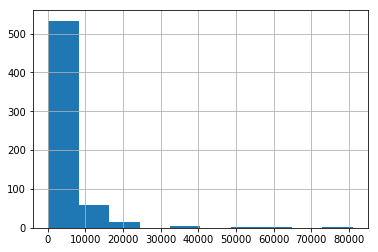

In [123]:
# Análisis Univariado de los atributos del data set
%matplotlib inline
import matplotlib.pyplot as plt

train['ApplicantIncome'].hist()


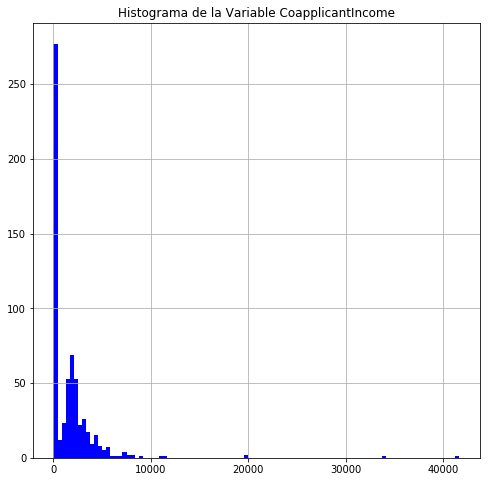

In [124]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.title('Histograma de la Variable CoapplicantIncome')
train['CoapplicantIncome'].hist(figsize=(8,8),color="blue",bins=100)

### Cuartiles y diagramas de cajas

Los cuartiles son los tres valores de la variable estadística que dividen a un conjunto de datos ordenados en cuatro partes iguales. Q1, Q2 y Q3 determinan los valores correspondientes al 25%, al 50% y al 75% de los datos. Q2 coincide con la mediana.

Los diagramas de cajas son una presentación visual que describe varias características importantes al mismo tiempo, tales como la dispersión y simetría. Para su realización se representan los tres cuartiles y los valores mínimo y máximo de los datos, sobre un rectángulo, alineado horizontal o verticalmente. Estos gráficos nos proporcionan abundante información y son sumamente útiles para encontrar valores atípicos y comparar dos conjunto de datos.



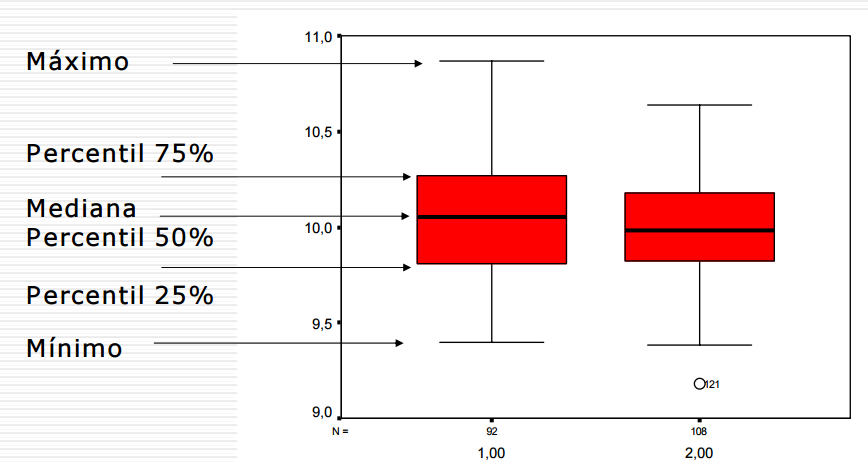

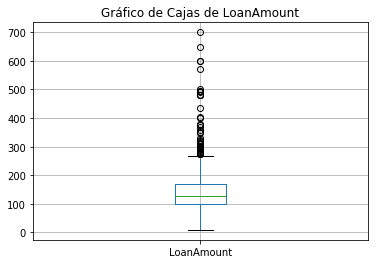

In [125]:
# Gráfico de Cajas
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.title('Gráfico de Cajas de LoanAmount')
#train.boxplot(column='LoanAmount',showfliers='T',notch=0, sym='+', vert=1, whis=1.5)
train.boxplot(column='LoanAmount')

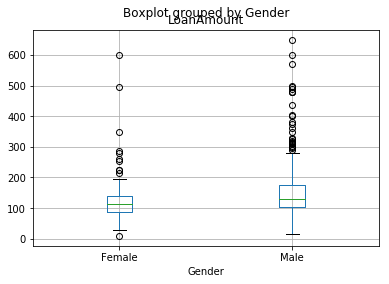

In [126]:
train.boxplot('LoanAmount',by='Gender')

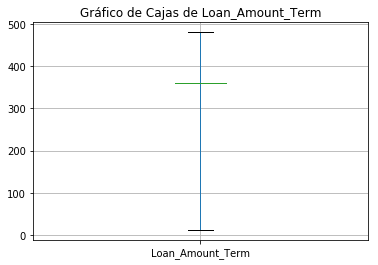

In [127]:
import matplotlib.pyplot as plt
plt.title('Gráfico de Cajas de Loan_Amount_Term')
train.boxplot(column='Loan_Amount_Term',autorange='T',showfliers='T',notch=0, sym='+', vert=1, whis=1.5)

In [128]:
# Tablas de contingencia para variables cualitativas

In [129]:
# Tabla de Contingencia para la Variable Loan_Status
import numpy as np
import pandas as pd
import os

my_tab = pd.crosstab(train["Loan_Status"],columns="count",normalize='all')
my_tab

col_0,count
Loan_Status,
N,0.312704
Y,0.687296


In [130]:
# Tabla de Contingencia para la Variable Gender
import numpy as np
import pandas as pd
import os

my_tab = pd.crosstab(index=train["Gender"],columns="count",normalize='all')
my_tab

col_0,count
Gender,
Female,0.186356
Male,0.813644


In [131]:
# Tabla de Contingencia para la Variable Married
import numpy as np
import pandas as pd
import os

my_tab = pd.crosstab(index=train["Married"],columns="count")
my_tab

col_0,count
Married,
No,213
Yes,398


#### 4 IMPUTACION DE LA DATA

In [132]:
# Revisar los valores perdidos
#Creamos una función:
def num_missing(x):
  return sum(x.isnull())

#Aplicamos por columna:
print ("Valores perdidos por columna")
print (train.apply(num_missing, axis=0)) # Axis = 0 es vertical , axis =1 horizontal.

# Vamos a imputar los registros nulos o missings

Valores perdidos por columna
Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [133]:
# Particionando la data en Numéricos (Variables Cuantitativas) y Factores (Variables Cualitativas)

In [134]:
# Conocimiento de los tipos o tipología de datos

In [135]:
# Recodificando y convirtiendo las variables de acuerdo a nuestro criterio
# Data de Entrenamiento
train['Dependents'] = train['Dependents'].replace({'0': 1,'1': 2, '2': 3, '3+': 4})
train['Gender'] = train['Gender'].replace({'Female': 1,'Male': 2})
train['Married'] = train['Married'].replace({'No': 1,'Yes': 2})
train['Self_Employed'] = train['Self_Employed'].replace({'No': 1,'Yes': 2})
train['Education'] = train['Education'].replace({'Graduate': 1,'Not Graduate': 2})
train['Credit_History'] = train['Credit_History'].replace({0: 1,1: 2})
train['Property_Area'] = train['Property_Area'].replace({'Rural': 1, 'Semiurban': 2, 'Urban': 3})
train['Loan_Status'] = train['Loan_Status'].replace({'N': 0,'Y': 1})

In [136]:
train.tail(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
604,LP002959,1.0,2.0,2.0,1,1.0,12000,0.0,496.0,360.0,2.0,2,1
605,LP002960,2.0,2.0,1.0,2,1.0,2400,3800.0,NaN,180.0,2.0,3,0
606,LP002961,2.0,2.0,2.0,1,1.0,3400,2500.0,173.0,360.0,2.0,2,1
607,LP002964,2.0,2.0,3.0,2,1.0,3987,1411.0,157.0,360.0,2.0,1,1
608,LP002974,2.0,2.0,1.0,1,1.0,3232,1950.0,108.0,360.0,2.0,1,1
609,LP002978,1.0,1.0,1.0,1,1.0,2900,0.0,71.0,360.0,2.0,1,1
610,LP002979,2.0,2.0,4.0,1,1.0,4106,0.0,40.0,180.0,2.0,1,1
611,LP002983,2.0,2.0,2.0,1,1.0,8072,240.0,253.0,360.0,2.0,3,1
612,LP002984,2.0,2.0,3.0,1,1.0,7583,0.0,187.0,360.0,2.0,3,1
613,LP002990,1.0,1.0,1.0,1,2.0,4583,0.0,133.0,360.0,1.0,2,0


In [137]:
# Revisamos si la recodigicación fue la idónea
train.describe(include='all') 
#train.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601.000000,611.000000,599.000000,614.000000,582.000000,614.000000,614.000000,592.000000,600.00000,564.000000,614.000000,614.000000
unique,614,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,LP001570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1.813644,1.651391,1.762938,1.218241,1.140893,5403.459283,1621.245798,146.412162,342.00000,1.842199,2.037459,0.687296
std,NaN,0.389718,0.476920,1.015216,0.413389,0.348211,6109.041673,2926.248369,85.587325,65.12041,0.364878,0.787482,0.463973
min,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,150.000000,0.000000,9.000000,12.00000,1.000000,1.000000,0.000000
25%,NaN,2.000000,1.000000,1.000000,1.000000,1.000000,2877.500000,0.000000,100.000000,360.00000,2.000000,1.000000,0.000000
50%,NaN,2.000000,2.000000,1.000000,1.000000,1.000000,3812.500000,1188.500000,128.000000,360.00000,2.000000,2.000000,1.000000
75%,NaN,2.000000,2.000000,3.000000,1.000000,1.000000,5795.000000,2297.250000,168.000000,360.00000,2.000000,3.000000,1.000000


In [138]:
# Recodificando y convirtiendo las variables de acuerdo a nuestro criterio
# Lo mismo que aplico al train, lo hago en el test
# Data de Test
test = pd.read_csv("C:/Users/Andre Chavez/Desktop/Data/test.csv") # Leer el dataset en un dataframe usando pandas
test['Dependents'] = test['Dependents'].replace({'0': 1,'1': 2, '2': 3, '3+': 4})
test['Gender'] = test['Gender'].replace({'Female': 1,'Male': 2})
test['Married'] = test['Married'].replace({'No': 1,'Yes': 2})
test['Self_Employed'] = test['Self_Employed'].replace({'No': 1,'Yes': 2})
test['Education'] = test['Education'].replace({'Graduate': 1,'Not Graduate': 2})
test['Credit_History'] = test['Credit_History'].replace({0: 1,1: 2})
test['Property_Area'] = test['Property_Area'].replace({'Rural': 1, 'Semiurban': 2, 'Urban': 3})

In [139]:
# Revisamos si la recodigicación fue la idónea
#test.describe(include='all') 
#test.head(10)

In [140]:
# Creamos un copia del dataset original para poder realizar las imputaciones
# Imputacion del Data train
train_parametrica=train.copy()

In [141]:
# Imputación Paramétrica
# Para variables cuantitativas se puede usar medias o medianas, para las cualitativas moda.
# Imputamos por las moda todas las variables cualitativas
from scipy.stats import mode

for column in ['Gender', 'Married', 'Self_Employed', 'Credit_History','Dependents']:
    train_parametrica[column] = train_parametrica[column].fillna(train_parametrica[column].mode()[0])

# Imputamos por las moda todas las variables cuantitativas

for column in ['LoanAmount', 'Loan_Amount_Term']:
    train_parametrica[column] = train_parametrica[column].fillna(train_parametrica[column].median())    

In [142]:
#train_parametrica.describe()

In [143]:
# Revisar los valores perdidos
#Creamos una función:
#def num_missing(x):
#  return sum(x.isnull())

#Aplicamos por columna:
print ("Valores perdidos por columna")
print (train_parametrica.apply(num_missing, axis=0)) 

Valores perdidos por columna
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [144]:
# Imputacion del Data Test
test_parametrica=test.copy()

In [145]:
# Revisar los valores perdidos
#Aplicamos por columna:
print ("Valores perdidos por columna")
print (test_parametrica.apply(num_missing, axis=0)) 

Valores perdidos por columna
Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64


In [146]:
# Imputación Paramétrica
# Para variables cuantitativas se puede usar medias o medianas, para las cualitativas moda.
# Imputamos por las moda todas las variables cualitativas
from scipy.stats import mode

for column in ['Gender', 'Married', 'Self_Employed', 'Credit_History','Dependents']:
    test_parametrica[column] = test_parametrica[column].fillna(test_parametrica[column].mode()[0])
    
# Imputamos por las moda todas las variables cuantitativas
for column in ['LoanAmount', 'Loan_Amount_Term']:
    test_parametrica[column] = test_parametrica[column].fillna(test_parametrica[column].median())  

In [147]:
# Revisar los valores perdidos

#Aplicamos por columna:
print ("Valores perdidos por columna")
print (test_parametrica.apply(num_missing, axis=0)) 

Valores perdidos por columna
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64


#### 5 CREACION Y TRANSFORMACION DE VARIABLES

##### Creación de Variables Paramétricamente o por Decisión de Negocio

In [148]:
# También conocido como proceso de Feature Engineering, no olvidar que todo lo que le hacemos al Train o Entrenamiento se lo
# debemos hacer a la data de test.

In [149]:
train_parametrica.shape

(614, 13)

In [150]:
# Creación de variables a partir de las definidas
# Ingenieria de datos
import numpy as np
import pandas as pd

#Creamos las variables para el entrenamiento o train
train_parametrica['TotalIncome'] = train_parametrica['ApplicantIncome'] + train_parametrica['CoapplicantIncome']
train_parametrica['LoanAmount_Log'] = round(np.log(train_parametrica['LoanAmount']+1),2)
train_parametrica['AmountxTerm']=round(train_parametrica['LoanAmount']/train_parametrica['Loan_Amount_Term'],2)

#Creamos las variables para la validación o test
test_parametrica['TotalIncome'] = test_parametrica['ApplicantIncome'] + test_parametrica['CoapplicantIncome']
test_parametrica['LoanAmount_Log'] = round(np.log(test_parametrica['LoanAmount']+1),2)
test_parametrica['AmountxTerm']=round(test_parametrica['LoanAmount']/test_parametrica['Loan_Amount_Term'],2)


In [151]:
# Revisamos las variables creadas, derrepente queremos crear algunas más?
train_parametrica.shape

(614, 16)

In [152]:
train_parametrica.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,LoanAmount_Log,AmountxTerm
0,LP001002,2.0,1.0,1.0,1,1.0,5849,0.0,128.0,360.0,2.0,3,1,5849.0,4.86,0.36
1,LP001003,2.0,2.0,2.0,1,1.0,4583,1508.0,128.0,360.0,2.0,1,0,6091.0,4.86,0.36


In [153]:
# Le quitamos la variable Loan_ID o identificador único para poder modelar la información 
train_parametrica = train_parametrica.drop('Loan_ID', axis=1) # Axis=1
train_parametrica.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,LoanAmount_Log,AmountxTerm
0,2.0,1.0,1.0,1,1.0,5849,0.0,128.0,360.0,2.0,3,1,5849.0,4.86,0.36
1,2.0,2.0,2.0,1,1.0,4583,1508.0,128.0,360.0,2.0,1,0,6091.0,4.86,0.36


In [154]:
train_parametrica.shape

(614, 15)

In [155]:
################################################################################
###### Si deseamos balancear, podemos hacerlo con toda la informacion?  ########
################################################################################
# Creación de la data de train y la data de test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_parametrica.drop('Loan_Status', axis=1), 
                                                    train_parametrica['Loan_Status'], 
                                                    test_size=0.30,
                                                    stratify=train_parametrica['Loan_Status'],
                                               random_state=100)

In [156]:
#X_test.shape

In [157]:
# EL train y test lo concateno para poder mantener el mismo formato y codigo
train_parametrica = pd.concat([X_train, y_train], axis=1)

In [158]:
# Puedo corroborar que en mi data de train sigo teniendo el desbalance
train_parametrica.Loan_Status.value_counts()

1    295
0    134
Name: Loan_Status, dtype: int64

#### 6 BALANCEO DE LOS DATOS Y SELECCIÓN DE DRIVERS

## Remuestreo

Una técnica ampliamente adoptada para tratar conjuntos de datos altamente desequilibrados se llama remuestreo. Consiste en eliminar muestras de la clase mayoritaria (submuestreo o undersampling) y / o agregar más ejemplos de la clase minoritaria (sobremuestreo o oversampling).



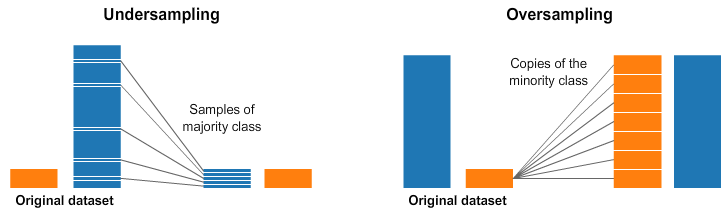

Clase 0: 134
Clase 1: 295
Proportion Clase 0: 0.31 : 0
Proportion Clase 1: 0.69 : 1


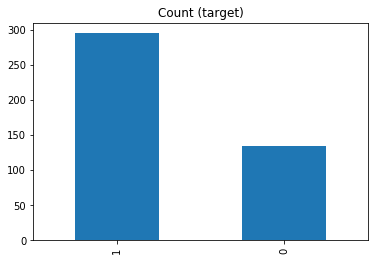

In [159]:
## Podemos hacer el balanceo de manera artesanal , para entender las lógicas.
import numpy as np
import pandas as pd
import seaborn as sns

target_count = train_parametrica.Loan_Status.value_counts()
print('Clase 0:', target_count[0])
print('Clase 1:', target_count[1])

print('Proportion Clase 0:', round(target_count[0] / (target_count[0]+target_count[1]), 2), ': 0')
print('Proportion Clase 1:', round(target_count[1] / (target_count[0]+target_count[1]), 2), ': 1')


target_count.plot(kind='bar', title='Count (target)');

In [160]:
# Conteo de las Clases
# La clase 1 es la de los préstamos otorgados , tenemos 422 préstamos otorgados
# La clase 0 es la de los préstamos no otorgados , tenemos 192 préstamos no otorgados
count_class_1,count_class_0 = train_parametrica.Loan_Status.value_counts()

# Dividimos las Clases
df_class_0 = train_parametrica[train_parametrica['Loan_Status'] == 0]
df_class_1 = train_parametrica[train_parametrica['Loan_Status'] == 1]

## Podemos visualizar el contenido del objeto df_class_1.head(5)

#### Undersampling o sub-muestreo

Random under-sampling:
1    134
0    134
Name: Loan_Status, dtype: int64


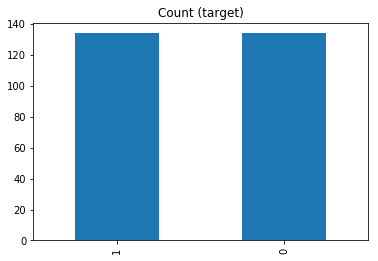

In [161]:
# Definimos una nueva variable llamada df_class_1_under la cual nos da un muestreo de la clase 1 dependiendo del número de 
# elementos de la clase 0.
df_class_1_under = df_class_1.sample(count_class_0)
df_balanceado_under = pd.concat([df_class_1_under, df_class_0], axis=0)

print('Random under-sampling:')
print(df_balanceado_under.Loan_Status.value_counts())

df_balanceado_under.Loan_Status.value_counts().plot(kind='bar', title='Count (target)');

In [162]:
# Podemos usar el dataset generado por undersampling para aplicar todos los algoritmos deseados
df_balanceado_under.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome,LoanAmount_Log,AmountxTerm,Loan_Status
289,2.0,1.0,1.0,1,1.0,9508,0.0,187.0,360.0,2.0,1,9508.0,5.24,0.52,1
155,2.0,2.0,4.0,1,1.0,39999,0.0,600.0,180.0,1.0,2,39999.0,6.40,3.33,1
92,2.0,2.0,3.0,2,1.0,3273,1820.0,81.0,360.0,2.0,3,5093.0,4.41,0.22,1


#### Oversampling o sobre-muestreo

Random over-sampling:
1    295
0    295
Name: Loan_Status, dtype: int64


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome,LoanAmount_Log,AmountxTerm,Loan_Status
544,1.0,2.0,1.0,2,1.0,3017,663.0,102.0,360.0,2.0,2,3680.0,4.63,0.28,1
383,2.0,1.0,1.0,1,2.0,7167,0.0,128.0,360.0,2.0,3,7167.0,4.86,0.36,1


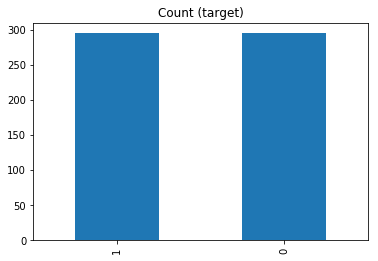

In [163]:
# Leemos la lógica : Del dataset de la clase 0 , sacamos una muestra de tamaño 422 con reemplazo.
df_class_0_over = df_class_0.sample(count_class_1, replace=True)
df_balanceado_over = pd.concat([df_class_1, df_class_0_over], axis=0)

print('Random over-sampling:')
print(df_balanceado_over.Loan_Status.value_counts())

df_balanceado_over.Loan_Status.value_counts().plot(kind='bar', title='Count (target)');
df_balanceado_over.head(2)

In [164]:
# Podemos usar el dataset generado por oversampling para aplicar todos los algoritmos deseados
df_balanceado_over.head(3)
#df_balanceado_over.describe() Podemos verificar cuántos elementos tenemos por under y over sampling

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome,LoanAmount_Log,AmountxTerm,Loan_Status
544,1.0,2.0,1.0,2,1.0,3017,663.0,102.0,360.0,2.0,2,3680.0,4.63,0.28,1
383,2.0,1.0,1.0,1,2.0,7167,0.0,128.0,360.0,2.0,3,7167.0,4.86,0.36,1
411,2.0,2.0,1.0,1,1.0,6256,0.0,160.0,360.0,2.0,3,6256.0,5.08,0.44,1


### Métodos de Balanceo Sofisticados

#### RandomUnderSampling

In [165]:
# Creamos nuestra matriz de datos o variables independientes y 
# nuestro vector columna con la variable independiente
#train_parametrica = train_parametrica.drop('Loan_ID', axis=1)
X, y = train_parametrica.drop('Loan_Status', axis=1),train_parametrica['Loan_Status']

In [166]:
# Importar la librería de balnacear datos, si no está hacer por el CMD de Python,
# la sentencia es : pip install imblearn desde el terminal de Conda
import imblearn

In [167]:
from imblearn.under_sampling import RandomUnderSampler
import numpy as np
import pandas as pd

rus = RandomUnderSampler(return_indices=True) # Define o instancian
X_rus, y_rus, id_rus = rus.fit_sample(X, y)   # Ejecuto

In [168]:
import numpy as np
import pandas as pd

df_X_rus = pd.DataFrame(data=X_rus,columns=X.columns)
df_y_rus = pd.DataFrame(data=y_rus,columns=['Loan_Status'])

# Concatenamos la información
df_balanceado_rus = pd.concat([df_X_rus, df_y_rus], axis=1)

In [169]:
df_balanceado_rus.Loan_Status.value_counts()

1    134
0    134
Name: Loan_Status, dtype: int64

#### RandomOverSampling

In [170]:
import numpy as np
import pandas as pd
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()            # Define o instancian
X_ros, y_ros = ros.fit_sample(X, y)  # Ejecuto

df_X_ros = pd.DataFrame(data=X_ros,columns=X.columns)
df_y_ros = pd.DataFrame(data=y_ros,columns=['Loan_Status'])

# Concatenamos la información
df_balanceado_ros = pd.concat([df_X_ros, df_y_ros], axis=1)

In [171]:
df_balanceado_ros.Loan_Status.value_counts()

1    295
0    295
Name: Loan_Status, dtype: int64

#### Balenceo de Datos TomekLink


La imputación TomekLink son pares de instancias muy cercanas, pero de clases opuestas. Eliminar las instancias de la clase mayoritaria de cada par aumenta el espacio entre las dos clases, lo que facilita el proceso de clasificación.

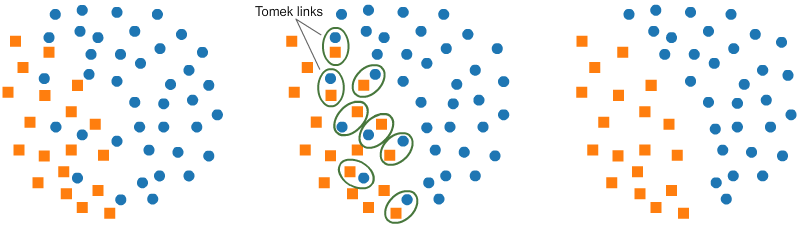

In [172]:
import numpy as np
import pandas as pd
from imblearn.under_sampling import TomekLinks

tl = TomekLinks(return_indices=True, ratio='majority') # Instancia o defines
X_tl, y_tl,id_tl  = tl.fit_sample(X, y)                # Aplicar

df_X_tl = pd.DataFrame(data=X_tl,columns=X.columns)
df_y_tl = pd.DataFrame(data=y_tl,columns=["Loan_Status"])

# Concatenamos la información
df_balanceado_tl = pd.concat([df_X_tl, df_y_tl], axis=1)

In [173]:
#df_balanceado_tl.head(3)
df_balanceado_tl.Loan_Status.value_counts()
# Eliminamos 54 obs de la frontera de decision

1    241
0    134
Name: Loan_Status, dtype: int64

In [174]:
df_balanceado_tl.head(1)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome,LoanAmount_Log,AmountxTerm,Loan_Status
0,2.0,1.0,1.0,1.0,1.0,1853.0,2840.0,114.0,360.0,2.0,1.0,4693.0,4.74,0.32,0


### Imputación UnderSampling: Centros de Conglomerados

Esta técnica realiza submuestreo generando centroides basados en métodos de agrupamiento. Los datos se agruparán previamente por similitud, a fin de preservar la información.

En este ejemplo, pasaremos el dict {1: 192} para la relación de parámetros, para preservar 192 elementos de la clase mayoritaria (1) y todos los elementos de la clase minoritaria (0).

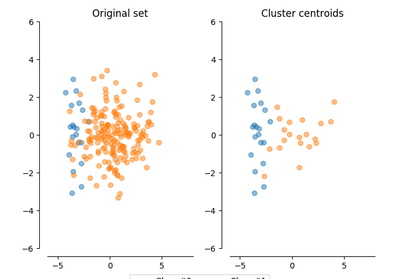

In [175]:
import numpy as np
import pandas as pd
from imblearn.under_sampling import ClusterCentroids

cc = ClusterCentroids(ratio={1: 134}) # Instancio
X_cc, y_cc = cc.fit_sample(X, y)      # Ajusto

df_X_cc = pd.DataFrame(data=X_cc,columns=X.columns)
df_y_cc = pd.DataFrame(data=y_cc,columns=["Loan_Status"])

# Concatenamos la información
df_balanceado_cc = pd.concat([df_X_cc, df_y_cc], axis=1)

In [176]:
df_balanceado_cc.Loan_Status.value_counts()

1    134
0    134
Name: Loan_Status, dtype: int64

### Imputación OverSampling: SMOTE

SMOTE (Técnica de sobremuestreo de Minorías Sintéticas) consiste en la síntesis de elementos para la clase minoritaria, basados en los que ya existen. Funciona eligiendo al azar un punto de la clase minoritaria y calcula los k vecinos más cercanos para este punto. Los puntos sintéticos se agregan entre el punto elegido y sus vecinos.

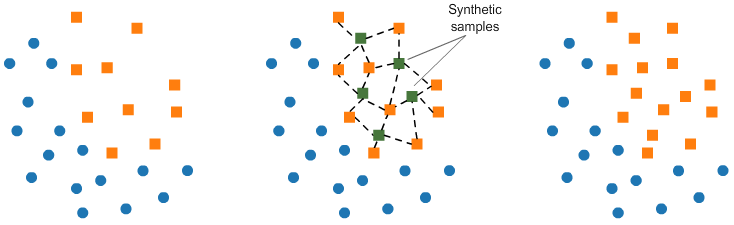

In [177]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(ratio='minority')
X_sm, y_sm = smote.fit_sample(X, y)

df_X_sm = pd.DataFrame(data=X_sm,columns=X.columns)
df_y_sm = pd.DataFrame(data=y_sm,columns=["Loan_Status"])

# Concatenamos la información
df_balanceado_sm = pd.concat([df_X_sm, df_y_sm], axis=1)

In [178]:
#df_balanceado_sm.head(3)
#df_balanceado_sm.describe()
df_balanceado_sm.Loan_Status.value_counts()

1    295
0    295
Name: Loan_Status, dtype: int64

### Imputación Over-sampling seguido de under-sampling (SMOTE + Tomek links)

Ahora, haremos una combinación de sobremuestreo y submuestreo, usando las técnicas de enlaces SMOTE y Tomek:

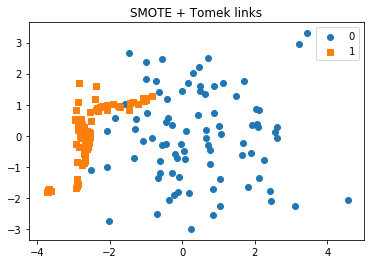

In [179]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek(ratio='auto')
X_smt, y_smt = smt.fit_sample(X, y)

df_X_smt = pd.DataFrame(data=X_smt,columns=X.columns)
df_y_smt = pd.DataFrame(data=y_smt,columns=["Loan_Status"])

# Concatenamos la información
df_balanceado_smt = pd.concat([df_X_smt, df_y_smt], axis=1)

In [180]:
#df_balanceado_smt.head(3)
#df_balanceado_smt.describe()
df_balanceado_smt.Loan_Status.value_counts()

1    244
0    244
Name: Loan_Status, dtype: int64


## Selección de Drivers

### Selección de Drivers Mediante Técnicas de Machine Learning

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier


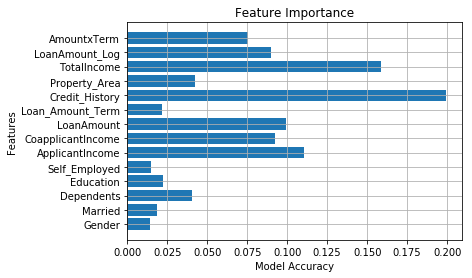

In [93]:
from sklearn.ensemble import RandomForestClassifier as RFC
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

forest = RFC()   # instancio
forest.fit(X_ros, y_ros) # Entreno
importances = forest.feature_importances_ # Variables importantes


# Grafico de las variables
pos = np.arange(14) + 0.5
plt.barh(pos, importances, align='center')
plt.title("Feature Importance")
plt.xlabel("Model Accuracy")
plt.ylabel("Features")
plt.yticks(pos, ('Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount'
             ,'Loan_Amount_Term','Credit_History','Property_Area','TotalIncome','LoanAmount_Log','AmountxTerm'))
plt.grid(True)


#### 7 MODELADO DE LA DATA

In [94]:
# Data Final : df_balanceado_smt pueden elegir cualquiera resultado del producto de un método de balanceo
import pandas as pd
from sklearn import datasets, linear_model
from matplotlib import pyplot as plt

#### Partición de la Data en Train y Test

In [99]:
#train_parametrica.head(1) # Desbalanceado
#df_balanceado_ros.head(1) # Random Over
#df_balanceado_rus.head(1) # Random Under
#df_balanceado_smt.head(1) # Smote
#df_balanceado_tl.head(1)  # Tomek Link

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome,LoanAmount_Log,AmountxTerm,Loan_Status
0,2.0,1.0,1.0,1.0,1.0,1853.0,2840.0,114.0,360.0,2.0,1.0,4693.0,4.74,0.32,0


In [100]:
# Creación de la data de train, separando o haciendo un split de nuestra información
X_train =train_parametrica.drop('Loan_Status',axis=1)
y_train = train_parametrica['Loan_Status']

#### Modelos Supervisados : Regresión Logística

In [101]:
# Paso N°01: Llamar un algoritmo predictivos
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (precision_score, recall_score,f1_score,accuracy_score)

modelito = LogisticRegression() # Instancio al algoritmo
modelito.fit(X_train, y_train) # Entrenamiento del modelo


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [103]:
# Paso N°02: Predecir con el algoritmo entrenado para validar
y_pred=modelito.predict(X_test) # Prediccion sobre el test

In [104]:
# Paso N°03: Comparar el valor pronosticado con el valor real
print("\tAccuracy: %1.3f\n" % accuracy_score(y_test, y_pred))
print("\tPrecision: %1.3f" % precision_score(y_test, y_pred))
print("\tRecall: %1.3f" % recall_score(y_test, y_pred))
print("\tF1: %1.3f\n" % f1_score(y_test, y_pred))

	Accuracy: 0.811

	Precision: 0.787
	Recall: 0.992
	F1: 0.878



In [195]:
# Selección de Drivers Paramétricos (Prueba para observar la salida)

from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 10)
rfe = rfe.fit(X_train, y_train)
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True False False False False  True  True False
  True  True  True]
[1 1 1 1 1 5 6 2 3 1 1 4 1 1 1]


In [61]:
# Regresión Logística por Metodología Estadística

X_train_lr = X_train[['Gender','Married','Dependents','Education','Self_Employed','LoanAmount'
             ,'Loan_Amount_Term','Credit_History','Property_Area','LoanAmount_Log','AmountxTerm']]
import statsmodels.api as sm
logit_model=sm.Logit(y_train,X_train_lr)
result=logit_model.fit()
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.537804
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:            Loan_Status   No. Observations:                  600
Model:                          Logit   Df Residuals:                      589
Method:                           MLE   Df Model:                           10
Date:                Wed, 22 May 2019   Pseudo R-squ.:                  0.2241
Time:                        18:32:58   Log-Likelihood:                -322.68
converged:                       True   LL-Null:                       -415.89
                                        LLR p-value:                 1.090e-34
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Gender              -0.4739      0.276     -1.718      0.086      -1.015       0.067
Married    

#### Realizamos la metodología de Cross Validation para tener un modelo preciso y estable a la vez

In [197]:
# Paso N°03: Comparar el valor pronosticado con el valor real
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

kfold = model_selection.KFold(n_splits=10, random_state=7)
lr = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(lr, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.667


In [198]:
# Obtenemos la matriz de confusión con las métricas anteriores
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.59      0.62        63
           1       0.80      0.84      0.82       122

   micro avg       0.76      0.76      0.76       185
   macro avg       0.73      0.72      0.72       185
weighted avg       0.75      0.76      0.75       185



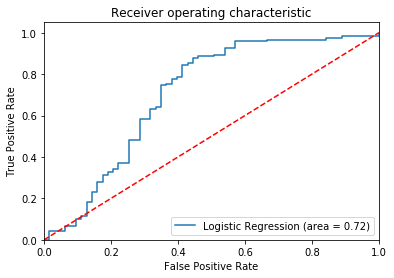

In [199]:
# Obtenemos la Curva Roc

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (precision_score, recall_score,f1_score,accuracy_score)

lr = LogisticRegression()
lr.fit(X_train, y_train)

logit_roc_auc = roc_auc_score(y_test, lr.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

##### Una vez corrido el algoritmo evaluamos sobre el Test y lo mandamos al submmit

In [200]:
X_train.head(1)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome,LoanAmount_Log,AmountxTerm,ApplicantIncome_Recod
0,1.0,1.0,1.0,1.0,1.0,3086.0,0.0,120.0,360.0,2.0,2.0,3086.0,4.8,0.33,2.0


In [106]:
test_parametrica.head(1)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome,LoanAmount_Log,AmountxTerm
0,LP001015,2.0,2,1.0,1,1.0,5720,0,110.0,360.0,2.0,3,5720,4.71,0.31


In [107]:
df2 = df2.drop("Loan_ID",axis=1)

In [108]:
#Creamos una copia para no perder el dataset de test o validación ya imputado
#df2 = df2.drop('Loan_ID', axis=1) # Le quitamos el ID para poder scorear o puntuar el modelo
y_final = modelito.predict(df2) # Predecimos sobre nuevos clientes o clientes sin la variable dependiente VD

data = np.hstack((test_parametrica['Loan_ID'].values.reshape(-1,1), y_final.reshape(-1,1)))
df_submmit = pd.DataFrame(data, columns=['Loan_ID','Loan_Status'])
df_submmit['Loan_Status']=["Y" if i == 1 else "N" for i in df_submmit['Loan_Status']]
df_submmit.to_csv('Modelito.csv', index=False)

#### Modelos Supervisados : KNN

In [204]:
from sklearn.neighbors import KNeighborsClassifier
# Cuando utilizo p=1 Manhathan, p=2 Euclídea 
neigh = KNeighborsClassifier(n_neighbors=20,algorithm='kd_tree',p=2)
neigh.fit(X_train, y_train) 

KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=20, p=2,
           weights='uniform')

In [205]:
#Calculamos la clase predicha, para poder evaluar la clasificación
y_pred = neigh.predict(X_test)

In [206]:
print("\tAccuracy: %1.3f\n" % accuracy_score(y_test, y_pred))
print("\tPrecision: %1.3f" % precision_score(y_test, y_pred))
print("\tRecall: %1.3f" % recall_score(y_test, y_pred))
print("\tF1: %1.3f\n" % f1_score(y_test, y_pred))

	Accuracy: 0.514

	Precision: 0.695
	Recall: 0.467
	F1: 0.559



#### Realizamos la metodología de Cross Validation para tener un modelo preciso y estable a la vez

In [207]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

kfold = model_selection.KFold(n_splits=10, random_state=7)
knn = KNeighborsClassifier(n_neighbors=20,algorithm='kd_tree',p=2)
scoring = 'accuracy'
results = model_selection.cross_val_score(knn, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.562


In [208]:
# Obtenemos la matriz de confusión con las métricas anteriores
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.37      0.60      0.46        63
           1       0.70      0.47      0.56       122

   micro avg       0.51      0.51      0.51       185
   macro avg       0.53      0.54      0.51       185
weighted avg       0.58      0.51      0.52       185



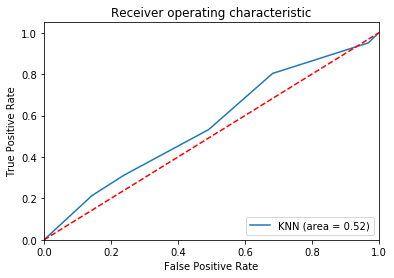

In [209]:
# Obtenemos la Curva Roc

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (precision_score, recall_score,f1_score,accuracy_score)

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

knn_roc_auc = roc_auc_score(y_test, knn.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNN (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('KNN_ROC')
plt.show()

In [99]:
#Utilizamos el datatest para poder utilizarlo en todos los algoritmos
df2 = test_parametrica.copy()
df2 = df2.drop("Loan_ID",axis=1)

In [100]:
#Creamos una copia para no perder el dataset de test o validación ya imputado
#df2 = df2.drop('Loan_ID', axis=1) # Le quitamos el ID para poder scorear o puntuar el modelo
y_final = neigh.predict(df2) # Predecimos sobre nuevos clientes o clientes sin la variable dependiente VD

data = np.hstack((test_parametrica['Loan_ID'].values.reshape(-1,1), y_final.reshape(-1,1)))
df_submmit = pd.DataFrame(data, columns=['Loan_ID','Loan_Status'])
df_submmit['Loan_Status']=["Y" if i == 1 else "N" for i in df_submmit['Loan_Status']]
df_submmit.to_csv('KNN0001.csv', index=False)

In [ ]:
# ¿Preprocesamiento?

In [210]:
from sklearn import preprocessing
X_scaled = preprocessing.scale(X_train)

In [211]:
# Entrenamos un algoritmo con las features estandarizadas y el target
neigh = KNeighborsClassifier(n_neighbors=20,algorithm='kd_tree',p=2)
neigh.fit(X_scaled, y_train) 

KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=20, p=2,
           weights='uniform')

In [214]:
#Calculamos la clase predicha, para poder evaluar la clasificación
X_test_scaled = preprocessing.scale(X_test)
y_pred = neigh.predict(X_test_scaled)

In [215]:
print("\tAccuracy: %1.3f\n" % accuracy_score(y_test, y_pred))
print("\tPrecision: %1.3f" % precision_score(y_test, y_pred))
print("\tRecall: %1.3f" % recall_score(y_test, y_pred))
print("\tF1: %1.3f\n" % f1_score(y_test, y_pred))

	Accuracy: 0.692

	Precision: 0.764
	Recall: 0.770
	F1: 0.767



In [110]:
# Que pasó ?
#MinMaxScaler
#MaxAbsScaler
#RobustScaler
#KernelCenterer
#QuantileTransformer
#PowerTransformer
#normalize
#KBinsDiscretizer 
#Binarization

#### Modelos Supervisados : Naive Bayes

In [351]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

# Paso1:Instanciamos el algoritmo 
NB = GaussianNB()
NB.fit(X_train, y_train)
GaussianNB(priors=None)

GaussianNB(priors=None, var_smoothing=1e-09)

In [352]:
#Calculamos la clase predicha, para poder evaluar la clasificación
y_pred = NB.predict(X_test)

In [354]:
print("\tAccuracy: %1.3f\n" % accuracy_score(y_test, y_pred))
print("\tPrecision: %1.3f" % precision_score(y_test, y_pred))
print("\tRecall: %1.3f" % recall_score(y_test, y_pred))
print("\tF1: %1.3f\n" % f1_score(y_test, y_pred))

	Accuracy: 0.741

	Precision: 0.764
	Recall: 0.877
	F1: 0.817



#### Realizamos la metodología de Cross Validation para tener un modelo preciso y estable a la vez

In [355]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

kfold = model_selection.KFold(n_splits=20, random_state=7)
NB = GaussianNB()
scoring = 'accuracy'
results = model_selection.cross_val_score(NB, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.715


In [244]:
# Obtenemos la matriz de confusión con las métricas anteriores
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.48      0.56        63
           1       0.76      0.88      0.82       122

   micro avg       0.74      0.74      0.74       185
   macro avg       0.72      0.68      0.69       185
weighted avg       0.73      0.74      0.73       185



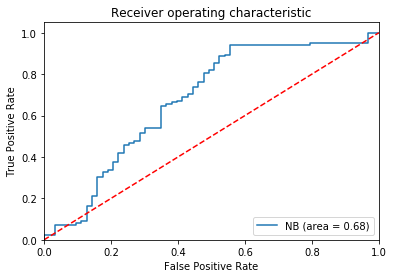

In [356]:
# Obtenemos la Curva Roc

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import (precision_score, recall_score,f1_score,accuracy_score)

NB = GaussianNB()
NB.fit(X_train, y_train)

knn_roc_auc = roc_auc_score(y_test, NB.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, NB.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='NB (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('NB_ROC')
plt.show()

#### Modelos Supervisados : Arboles de Clasificación

In [365]:
from sklearn.tree import DecisionTreeClassifier
#Parámetros del árbol de clasificación
# criterion  , splitter ,max_depth,min_impurity_decrease,min_impurity_split,min_samples_leaf,min_samples_split,splitter
arb = DecisionTreeClassifier(criterion='entropy',max_depth=5,max_features="sqrt")
arb.fit(X_train, y_train) # Entrenamos el algoritmo

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [358]:
#Calculamos la clase predicha, para poder evaluar la clasificación
y_pred = arb.predict(X_test)

In [359]:
#Atributos
print("\tAccuracy: %1.3f\n" % accuracy_score(y_test, y_pred))
print("\tPrecision: %1.3f" % precision_score(y_test, y_pred))
print("\tRecall: %1.3f" % recall_score(y_test, y_pred))
print("\tF1: %1.3f\n" % f1_score(y_test, y_pred))

	Accuracy: 0.784

	Precision: 0.770
	Recall: 0.959
	F1: 0.854



In [360]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

kfold = model_selection.KFold(n_splits=10, random_state=7)
arb = DecisionTreeClassifier(criterion='entropy',max_features='sqrt')
scoring = 'accuracy'
results = model_selection.cross_val_score(arb, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.827


In [361]:
# Obtenemos la matriz de confusión con las métricas anteriores
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.44      0.58        63
           1       0.77      0.96      0.85       122

   micro avg       0.78      0.78      0.78       185
   macro avg       0.81      0.70      0.72       185
weighted avg       0.80      0.78      0.76       185



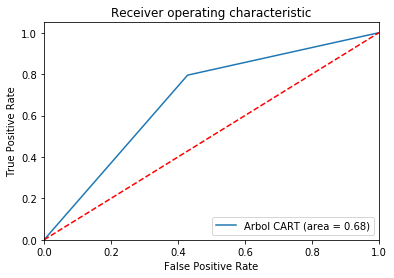

In [362]:
# Obtenemos la Curva Roc

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import (precision_score, recall_score,f1_score,accuracy_score)

arb = DecisionTreeClassifier(criterion='entropy',max_features='sqrt')
arb.fit(X_train, y_train)

arbol_roc_auc = roc_auc_score(y_test, arb.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, arb.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Arbol CART (area = %0.2f)' % arbol_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Arbol_CART_ROC')
plt.show()

In [363]:
df2 = test_parametrica.copy()
df2=df2.drop("Loan_ID",axis=1)

In [366]:
#Creamos una copia para no perder el dataset de test o validación ya imputado
y_final = arb.predict(df2) # Predecimos sobre nuevos clientes o clientes sin la variable dependiente VD
data = np.hstack((test_parametrica['Loan_ID'].values.reshape(-1,1), y_final.reshape(-1,1)))
df_submmit = pd.DataFrame(data, columns=['Loan_ID','Loan_Status'])
df_submmit['Loan_Status']=["Y" if i == 1 else "N" for i in df_submmit['Loan_Status']]
df_submmit.to_csv('Arbol_CART.csv', index=False)

#### Modelos Supervisados : Máquinas de Soporte Vectorial

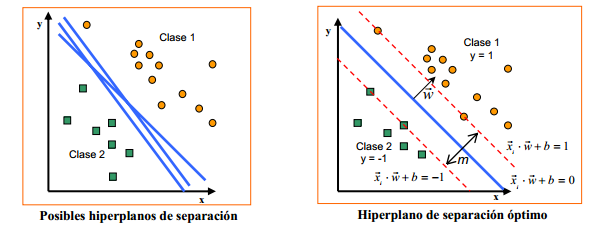

In [ ]:
# Otros modelos de SVM (Distintos Kernels)
  ## svm.SVC(kernel='rbf', gamma=0.7, C=1)
  ## svm.SVC(kernel='poly', degree=3, C=1)

In [216]:
from sklearn import svm
# Parámetros disponibles:
# Kernel disponibles en Python ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’ 
# degree : Opcional , por defecto 3,se usa para el Kernel Polinomial.
# gamma : Coeficiente de Kernel para 'rbf', 'poly' y 'sigmoid'. Si gamma es 'auto', entonces se usarán 1 / n° features en su lugar.
# shrinking : Contracción de parámetros, por defecto es T
# tol : Tolerancia para el criterio de parada.
# random_state : Semilla aleatoria 
# Demora así que tener cuidado
C = 1.0  # parametro de regulacion SVM 
svc = svm.SVC(kernel='linear', C=C)
#rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C)
#poly_svc = svm.SVC(kernel='poly', degree=3, C=C)
#lin_svc = svm.LinearSVC(C=C).fit(X, y)
#svmkl=svm.SVC(kernel="linear", C=0.025)
svc.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [217]:
#Calculamos la clase predicha, para poder evaluar la clasificación
y_pred = svc.predict(X_test)

In [218]:
#Atributos
#arb.classes_ ,feature_importances_ ,max_features_ ,tree_ 
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
print("\tAccuracy: %1.3f\n" % accuracy_score(y_test, y_pred))
print("\tPrecision: %1.3f" % precision_score(y_test, y_pred))
print("\tRecall: %1.3f" % recall_score(y_test, y_pred))
print("\tF1: %1.3f\n" % f1_score(y_test, y_pred))

	Accuracy: 0.643

	Precision: 0.759
	Recall: 0.672
	F1: 0.713



In [ ]:
# Dejarlo correr con tiempo, aprox 6 minutos
from sklearn import svm
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

kfold = model_selection.KFold(n_splits=2, random_state=7)
svc = svm.SVC(kernel='linear', C=1)
scoring = 'accuracy' # Podemos también cambiar la métrica , por ejemplo :
# ‘accuracy’ ‘average_precision’ ‘f1’ ‘precision’ ‘recall’
results = model_selection.cross_val_score(svc, X_train, y_train, cv=kfold, scoring=scoring)
print("5-fold cross validation average accuracy: %.3f" % (results.mean()))

In [219]:
# Obtenemos la matriz de confusión con las métricas anteriores
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.48      0.59      0.53        63
           1       0.76      0.67      0.71       122

   micro avg       0.64      0.64      0.64       185
   macro avg       0.62      0.63      0.62       185
weighted avg       0.66      0.64      0.65       185



#### Modelos Supervisados : Random Forest

In [221]:
X_train.shape

(600, 15)

In [222]:
from sklearn.ensemble import RandomForestClassifier
# Parámetros  :
# max_features : None ,'sqrt',%X
# n_estimators  : Número de árboles a utilizar
# min_sample_leaf : Tamaño mínimo de elementos en hojas terminales (Nodos hijos)
# random_state : Semilla aleatoria
# oob_score : Error fuera de bolsa
#rf = RandomForestClassifier(max_features=4 , n_estimators=200,oob_score=True,max_depth=2)
rf = RandomForestClassifier(max_features=5,
                            n_estimators=1000,
                            oob_score=True,
                            max_depth=5)
rf.fit(X_train, y_train) # Entrenando un algoritmo

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features=5, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [223]:
#Calculamos la clase predicha, para poder evaluar la clasificación
y_pred = rf.predict(X_test)

In [224]:
#Atributos
#rf.estimators_ ,classes_  ,max_features_ ,n_classes_ ,n_features_ ,n_outputs_ ,feature_importances_ ,oob_score_  
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
print("\tAccuracy: %1.3f\n" % accuracy_score(y_test, y_pred))
print("\tPrecision: %1.3f" % precision_score(y_test, y_pred))
print("\tRecall: %1.3f" % recall_score(y_test, y_pred))
print("\tF1: %1.3f\n" % f1_score(y_test, y_pred))

	Accuracy: 0.746

	Precision: 0.762
	Recall: 0.893
	F1: 0.823



#### Realizamos la metodología de Cross Validation para tener un modelo preciso y estable a la vez

In [ ]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
# Probar con diferentes parámetros de min_samples_leaf = 20
kfold = model_selection.KFold(n_splits=10, random_state=7)
rf = RandomForestClassifier(max_features='sqrt', n_estimators=500,oob_score=True)
scoring = 'accuracy'
results = model_selection.cross_val_score(rf, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

In [225]:
# Obtenemos la matriz de confusión con las métricas anteriores
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.46      0.55        63
           1       0.76      0.89      0.82       122

   micro avg       0.75      0.75      0.75       185
   macro avg       0.73      0.68      0.69       185
weighted avg       0.74      0.75      0.73       185



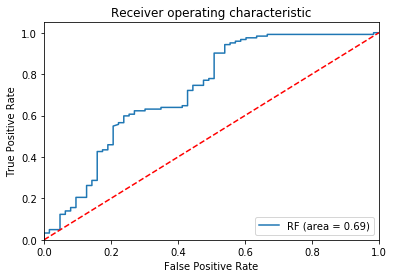

In [226]:
# Obtenemos la Curva Roc

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import (precision_score, recall_score,f1_score,accuracy_score)

rf = RandomForestClassifier(max_features=5 , n_estimators=200,oob_score=True,max_depth=2)
rf.fit(X_train, y_train)

rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='RF (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Random_Forest_ROC')
plt.show()

In [229]:
#Le quitamos el ID para poder scorear o puntuar el modelo
#df2 = test_parametrica.copy()
df2=df2.drop("Loan_ID",axis=1)

In [230]:
#Creamos una copia para no perder el dataset de test o validación ya imputado
y_final = rf.predict(df2) # Predecimos sobre nuevos clientes o clientes sin la variable dependiente VD
data = np.hstack((test_parametrica['Loan_ID'].values.reshape(-1,1), y_final.reshape(-1,1)))
df_submmit = pd.DataFrame(data, columns=['Loan_ID','Loan_Status'])
df_submmit['Loan_Status']=["Y" if i == 1 else "N" for i in df_submmit['Loan_Status']]
df_submmit.to_csv('RandomForest_ML.csv', index=False)

### AdaBoost

In [320]:
from sklearn.ensemble import AdaBoostClassifier
# Parámetros :
# base_estimator : Es el estimador base sobre la cual el ensamble es constuido.
# n_estimators : Numero de estimadores con los cuales se construye el ensamble.
# random_state : semilla aleatoria
AdaBoost=AdaBoostClassifier(learning_rate=0.01, n_estimators=100)
AdaBoost.fit(X_train, y_train) 

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.01, n_estimators=100, random_state=None)

In [321]:
#Calculamos la clase predicha, para poder evaluar la clasificación
y_pred = AdaBoost.predict(X_test)

In [322]:
#Atributos
#rf.estimators_ ,classes_  ,max_features_ ,n_classes_ ,n_features_ ,n_outputs_ ,feature_importances_ ,oob_score_  
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
print("\tAccuracy: %1.3f\n" % accuracy_score(y_test, y_pred))
print("\tPrecision: %1.3f" % precision_score(y_test, y_pred))
print("\tRecall: %1.3f" % recall_score(y_test, y_pred))
print("\tF1: %1.3f\n" % f1_score(y_test, y_pred))

	Accuracy: 0.778

	Precision: 0.758
	Recall: 0.975
	F1: 0.853



#### Realizamos la metodología de Cross Validation para tener un modelo preciso y estable a la vez

In [238]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

kfold = model_selection.KFold(n_splits=20, random_state=7)
AdaBoost=AdaBoostClassifier()
scoring = 'accuracy'
results = model_selection.cross_val_score(AdaBoost, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.767


In [323]:
# Obtenemos la matriz de confusión con las métricas anteriores
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.40      0.55        63
           1       0.76      0.98      0.85       122

   micro avg       0.78      0.78      0.78       185
   macro avg       0.83      0.69      0.70       185
weighted avg       0.80      0.78      0.75       185



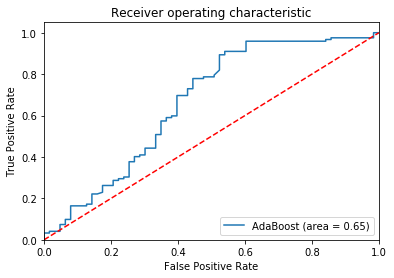

In [324]:
# Obtenemos la Curva Roc

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import (precision_score, recall_score,f1_score,accuracy_score)

AdaBoost=AdaBoostClassifier()
AdaBoost.fit(X_train, y_train)

AdaBoost_roc_auc = roc_auc_score(y_test, AdaBoost.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, AdaBoost.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AdaBoost (area = %0.2f)' % AdaBoost_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('AdaBoost_ROC')
plt.show()

##### Una vez corrido el algoritmo evaluamos sobre el Test y lo mandamos al submmit

In [80]:
df2 = test_parametrica.copy()

In [82]:
#Creamos una copia para no perder el dataset de test o validación ya imputado
df2 = df2.drop('Loan_ID', axis=1) # Le quitamos el ID para poder scorear o puntuar el modelo
y_final = AdaBoost.predict(df2) # Predecimos sobre nuevos clientes o clientes sin la variable dependiente VD

data = np.hstack((test_parametrica['Loan_ID'].values.reshape(-1,1), y_final.reshape(-1,1)))
df_submmit = pd.DataFrame(data, columns=['Loan_ID','Loan_Status'])
df_submmit['Loan_Status']=["Y" if i == 1 else "N" for i in df_submmit['Loan_Status']]
df_submmit.to_csv('Submmit_AdaBoost_001.csv', index=False)

### GBM

In [1]:
from sklearn import ensemble

params = {'n_estimators': 500,
          'max_depth': 3,
          'subsample': 0.60,
          'learning_rate': 0.01, 
          'min_samples_leaf': 30, 
          'random_state': 3}
Gbm = ensemble.GradientBoostingClassifier(**params)
Gbm.fit(X_train, y_train) 

NameError: name 'X_train' is not defined

In [326]:
#Calculamos la clase predicha, para poder evaluar la clasificación
y_pred = Gboost.predict(X_test)

In [327]:
#Atributos
#rf.estimators_ ,classes_  ,max_features_ ,n_classes_ ,n_features_ ,n_outputs_ ,feature_importances_ ,oob_score_  
from sklearn.metrics import (precision_score, recall_score,f1_score,accuracy_score)
print("\tAccuracy: %1.3f\n" % accuracy_score(y_test, y_pred))
print("\tPrecision: %1.3f" % precision_score(y_test, y_pred))
print("\tRecall: %1.3f" % recall_score(y_test, y_pred))
print("\tF1: %1.3f\n" % f1_score(y_test, y_pred))

	Accuracy: 0.719

	Precision: 0.765
	Recall: 0.828
	F1: 0.795



In [244]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

kfold = model_selection.KFold(n_splits=10, random_state=7)
Gboost = ensemble.GradientBoostingClassifier(**params)
scoring = 'accuracy'
results = model_selection.cross_val_score(Gboost, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.757


In [328]:
# Obtenemos la matriz de confusión con las métricas anteriores
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.51      0.55        63
           1       0.77      0.83      0.80       122

   micro avg       0.72      0.72      0.72       185
   macro avg       0.68      0.67      0.67       185
weighted avg       0.71      0.72      0.71       185



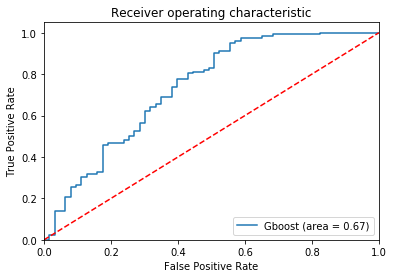

In [329]:
# Obtenemos la Curva Roc

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import (precision_score, recall_score,f1_score,accuracy_score)

Gboost = ensemble.GradientBoostingClassifier(**params)
Gboost.fit(X_train, y_train)

Gboost_roc_auc = roc_auc_score(y_test, Gboost.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, Gboost.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Gboost (area = %0.2f)' % Gboost_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Gboost_ROC')
plt.show()

In [330]:
#Utilizamos el datatest para poder utilizarlo en todos los algoritmos
df2 = test_parametrica.copy()

In [89]:
#Creamos una copia para no perder el dataset de test o validación ya imputado
#df2 = df2.drop('Loan_ID', axis=1) # Le quitamos el ID para poder scorear o puntuar el modelo
y_final = Gboost.predict(df2) # Predecimos sobre nuevos clientes o clientes sin la variable dependiente VD

data = np.hstack((test_parametrica['Loan_ID'].values.reshape(-1,1), y_final.reshape(-1,1)))
df_submmit = pd.DataFrame(data, columns=['Loan_ID','Loan_Status'])
df_submmit['Loan_Status']=["Y" if i == 1 else "N" for i in df_submmit['Loan_Status']]
df_submmit.to_csv('GBM_00007.csv', index=False)

### XGBoost

In [247]:
# Importamos la librería de XgBoost
import xgboost as xgb

In [331]:
XGBoost=xgb.XGBClassifier(random_state=1)
XGBoost.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=1,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [333]:
# Nuestro modelo ya entrenado lo ponemos a prueba con al data de test
y_pred=XGBoost.predict(X_test)

In [334]:
# Obtenemos la matriz de confusión con las métricas anteriores
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.51      0.58        63
           1       0.78      0.88      0.82       122

   micro avg       0.75      0.75      0.75       185
   macro avg       0.73      0.69      0.70       185
weighted avg       0.74      0.75      0.74       185



In [252]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

kfold = model_selection.KFold(n_splits=10, random_state=7)
XGBoost=xgb.XGBClassifier(random_state=1)
scoring = 'accuracy'
results = model_selection.cross_val_score(XGBoost, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.820


##### Una vez corrido el algoritmo evaluamos sobre el Test y lo mandamos al submmit

In [337]:
#Utilizamos el datatest para poder utilizarlo en todos los algoritmos
#test_parametrica.head(5)
df2 = test_parametrica.copy()
df2=df2.drop("Loan_ID",axis=1)

In [338]:
y_final = XGBoost.predict(df2)

In [109]:
# Predecimos sobre nuevos clientes o clientes sin la variable dependiente VD 
data = np.hstack((test_parametrica['Loan_ID'].values.reshape(-1,1), y_final.reshape(-1,1)))
df_submmit = pd.DataFrame(data, columns=['Loan_ID','Loan_Status'])
df_submmit['Loan_Status']=["Y" if i == 1 else "N" for i in df_submmit['Loan_Status']]
df_submmit.to_csv('XGBoost_007.csv', index=False)

### LightGBM

In [339]:
# Importamos la librería de LightGBM
import lightgbm as lgb

In [340]:
# Convertimos nuestra data de train y test en una matriz LightGBM
train_data=lgb.Dataset(X_train,label=y_train)

In [341]:
# Definimos los parámetros y ajustamos el algoritmos a la data
params = {'objective':'binary'}
LightGBM= lgb.train(params, train_data, 100) 


In [342]:
# Predecimos con el algoritmo entrenado sobre el test y evaluamos
y_pred=LightGBM.predict(X_test)

In [344]:
#y_pred

In [345]:
# Convertimos las probabilidades en clases
for i in range(0,185):
    if y_pred[i]>0.5: 
        y_pred[i]=1
    else: 
        y_pred[i]=0

In [346]:
# Obtenemos la matriz de confusión con las métricas anteriores
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.52      0.59        63
           1       0.78      0.88      0.83       122

   micro avg       0.76      0.76      0.76       185
   macro avg       0.73      0.70      0.71       185
weighted avg       0.75      0.76      0.75       185



In [347]:
#Utilizamos el datatest para poder utilizarlo en todos los algoritmos
df2 = test_parametrica.copy()
df2=df2.drop("Loan_ID",axis=1)

In [348]:
# Predecimos con el algoritmo sobre la data de test
y_final = LightGBM.predict(df2)

In [349]:
#Creamos una copia para no perder el dataset de test o validación ya imputado
# Predecimos sobre nuevos clientes o clientes sin la variable dependiente VD
for i in range(0,367): 
    if y_final[i]>=.5:       # setting threshold to .5 
       y_final[i]=1 
    else: 
       y_final[i]=0  
    
data = np.hstack((test_parametrica['Loan_ID'].values.reshape(-1,1), y_final.reshape(-1,1)))
df_submmit = pd.DataFrame(data, columns=['Loan_ID','Loan_Status'])
df_submmit['Loan_Status']=["Y" if i == 1 else "N" for i in df_submmit['Loan_Status']]
df_submmit.to_csv('LightGBM_006.csv', index=False)

### CatBoost

In [350]:
from catboost import CatBoostClassifier
CatBoost=CatBoostClassifier(eval_metric="AUC",one_hot_max_size=20,
                            depth=3, iterations= 800, l2_leaf_reg= 9, 
                            learning_rate= 0.01)

In [352]:
#X_train.head(1)

In [353]:
# Ajustamos un modelo de clasificación
Cat=CatBoost.fit(X_train,y_train,cat_features=([ 0,1,2,3,4,9,10,14]))


0:	learn: 0.7519111	total: 9.2ms	remaining: 7.35s
1:	learn: 0.7558500	total: 17ms	remaining: 6.8s
2:	learn: 0.7901667	total: 25.4ms	remaining: 6.75s
3:	learn: 0.8044667	total: 34.2ms	remaining: 6.8s
4:	learn: 0.8133111	total: 42.4ms	remaining: 6.74s
5:	learn: 0.8134167	total: 50.7ms	remaining: 6.71s
6:	learn: 0.8232056	total: 60.9ms	remaining: 6.89s
7:	learn: 0.8189222	total: 68.6ms	remaining: 6.79s
8:	learn: 0.8193500	total: 76.6ms	remaining: 6.74s
9:	learn: 0.8306722	total: 84.5ms	remaining: 6.67s
10:	learn: 0.8368056	total: 92.8ms	remaining: 6.65s
11:	learn: 0.8337500	total: 104ms	remaining: 6.8s
12:	learn: 0.8319833	total: 115ms	remaining: 6.96s
13:	learn: 0.8329667	total: 124ms	remaining: 6.96s
14:	learn: 0.8329667	total: 130ms	remaining: 6.79s
15:	learn: 0.8323500	total: 138ms	remaining: 6.75s
16:	learn: 0.8381167	total: 146ms	remaining: 6.73s
17:	learn: 0.8378000	total: 154ms	remaining: 6.68s
18:	learn: 0.8390833	total: 164ms	remaining: 6.74s
19:	learn: 0.8401556	total: 171ms	re

162:	learn: 0.8711444	total: 1.41s	remaining: 5.5s
163:	learn: 0.8711111	total: 1.42s	remaining: 5.5s
164:	learn: 0.8711444	total: 1.43s	remaining: 5.49s
165:	learn: 0.8709889	total: 1.43s	remaining: 5.48s
166:	learn: 0.8712556	total: 1.44s	remaining: 5.47s
167:	learn: 0.8714444	total: 1.45s	remaining: 5.46s
168:	learn: 0.8715889	total: 1.46s	remaining: 5.45s
169:	learn: 0.8713111	total: 1.47s	remaining: 5.44s
170:	learn: 0.8716778	total: 1.48s	remaining: 5.43s
171:	learn: 0.8721889	total: 1.48s	remaining: 5.42s
172:	learn: 0.8732444	total: 1.49s	remaining: 5.41s
173:	learn: 0.8734667	total: 1.5s	remaining: 5.4s
174:	learn: 0.8733556	total: 1.51s	remaining: 5.39s
175:	learn: 0.8734333	total: 1.52s	remaining: 5.38s
176:	learn: 0.8738667	total: 1.53s	remaining: 5.37s
177:	learn: 0.8738778	total: 1.53s	remaining: 5.36s
178:	learn: 0.8738444	total: 1.54s	remaining: 5.35s
179:	learn: 0.8739667	total: 1.55s	remaining: 5.33s
180:	learn: 0.8742889	total: 1.55s	remaining: 5.32s
181:	learn: 0.87

324:	learn: 0.8996444	total: 2.82s	remaining: 4.12s
325:	learn: 0.8999333	total: 2.83s	remaining: 4.11s
326:	learn: 0.8998889	total: 2.84s	remaining: 4.1s
327:	learn: 0.9000889	total: 2.85s	remaining: 4.1s
328:	learn: 0.8998667	total: 2.86s	remaining: 4.09s
329:	learn: 0.9001111	total: 2.87s	remaining: 4.08s
330:	learn: 0.9006778	total: 2.88s	remaining: 4.07s
331:	learn: 0.9011556	total: 2.88s	remaining: 4.07s
332:	learn: 0.9010556	total: 2.89s	remaining: 4.06s
333:	learn: 0.9014667	total: 2.9s	remaining: 4.05s
334:	learn: 0.9016000	total: 2.91s	remaining: 4.04s
335:	learn: 0.9014333	total: 2.92s	remaining: 4.03s
336:	learn: 0.9017222	total: 2.92s	remaining: 4.02s
337:	learn: 0.9017444	total: 2.93s	remaining: 4.01s
338:	learn: 0.9020556	total: 2.94s	remaining: 4s
339:	learn: 0.9021667	total: 2.96s	remaining: 4s
340:	learn: 0.9026889	total: 2.96s	remaining: 3.99s
341:	learn: 0.9028556	total: 2.98s	remaining: 3.99s
342:	learn: 0.9030333	total: 2.98s	remaining: 3.98s
343:	learn: 0.9032556

493:	learn: 0.9182444	total: 4.25s	remaining: 2.63s
494:	learn: 0.9185111	total: 4.26s	remaining: 2.63s
495:	learn: 0.9186111	total: 4.27s	remaining: 2.62s
496:	learn: 0.9188333	total: 4.28s	remaining: 2.61s
497:	learn: 0.9189667	total: 4.29s	remaining: 2.6s
498:	learn: 0.9191444	total: 4.29s	remaining: 2.59s
499:	learn: 0.9193222	total: 4.3s	remaining: 2.58s
500:	learn: 0.9195444	total: 4.31s	remaining: 2.57s
501:	learn: 0.9197111	total: 4.32s	remaining: 2.56s
502:	learn: 0.9197333	total: 4.33s	remaining: 2.56s
503:	learn: 0.9196556	total: 4.34s	remaining: 2.55s
504:	learn: 0.9197222	total: 4.35s	remaining: 2.54s
505:	learn: 0.9197556	total: 4.36s	remaining: 2.53s
506:	learn: 0.9197556	total: 4.36s	remaining: 2.52s
507:	learn: 0.9197667	total: 4.37s	remaining: 2.51s
508:	learn: 0.9200889	total: 4.38s	remaining: 2.5s
509:	learn: 0.9200778	total: 4.39s	remaining: 2.49s
510:	learn: 0.9200000	total: 4.39s	remaining: 2.48s
511:	learn: 0.9198778	total: 4.4s	remaining: 2.48s
512:	learn: 0.91

655:	learn: 0.9318444	total: 5.66s	remaining: 1.24s
656:	learn: 0.9319889	total: 5.67s	remaining: 1.23s
657:	learn: 0.9319889	total: 5.68s	remaining: 1.23s
658:	learn: 0.9319889	total: 5.68s	remaining: 1.22s
659:	learn: 0.9320333	total: 5.69s	remaining: 1.21s
660:	learn: 0.9322222	total: 5.7s	remaining: 1.2s
661:	learn: 0.9322444	total: 5.71s	remaining: 1.19s
662:	learn: 0.9322889	total: 5.72s	remaining: 1.18s
663:	learn: 0.9326444	total: 5.72s	remaining: 1.17s
664:	learn: 0.9326889	total: 5.74s	remaining: 1.16s
665:	learn: 0.9329000	total: 5.75s	remaining: 1.16s
666:	learn: 0.9328889	total: 5.76s	remaining: 1.15s
667:	learn: 0.9328556	total: 5.77s	remaining: 1.14s
668:	learn: 0.9330222	total: 5.78s	remaining: 1.13s
669:	learn: 0.9330778	total: 5.79s	remaining: 1.12s
670:	learn: 0.9333444	total: 5.8s	remaining: 1.11s
671:	learn: 0.9334556	total: 5.81s	remaining: 1.11s
672:	learn: 0.9334444	total: 5.82s	remaining: 1.1s
673:	learn: 0.9335778	total: 5.83s	remaining: 1.09s
674:	learn: 0.93

In [354]:
# Predecimos con el algoritmo entrenado sobre el test y evaluamos
y_pred=Cat.predict(X_test)

In [355]:
# Obtenemos la matriz de confusión con las métricas anteriores
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.51      0.59        63
           1       0.78      0.89      0.83       122

   micro avg       0.76      0.76      0.76       185
   macro avg       0.74      0.70      0.71       185
weighted avg       0.75      0.76      0.75       185



In [356]:
#Utilizamos el datatest para poder utilizarlo en todos los algoritmos
df2 = test_parametrica.copy()
df2=df2.drop("Loan_ID",axis=1)

In [357]:
# Predecimos con el algoritmo sobre la data de test
y_final = Cat.predict(df2)

In [285]:
data = np.hstack((test_parametrica['Loan_ID'].values.reshape(-1,1), y_final.reshape(-1,1)))
df_submmit = pd.DataFrame(data, columns=['Loan_ID','Loan_Status'])
df_submmit['Loan_Status']=["Y" if i == 1 else "N" for i in df_submmit['Loan_Status']]
df_submmit.to_csv('CatBoost_006.csv', index=False)

#### Modelos Supervisados : Ensamble de Modelos

In [359]:
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

eclf = VotingClassifier(estimators=[('Naive Bayes Gaussian', GaussianNB()), 
                                    ('Naive Bayes Multinomial', MultinomialNB()), 
                                    ('Naive Bayes Bernoulli', BernoulliNB())], 
                        voting='soft')

eclf.fit(X_train, y_train) 



VotingClassifier(estimators=[('Naive Bayes Gaussian', GaussianNB(priors=None, var_smoothing=1e-09)), ('Naive Bayes Multinomial', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)), ('Naive Bayes Bernoulli', BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True))],
         flatten_transform=None, n_jobs=None, voting='soft', weights=None)

In [360]:
#Calculamos la clase predicha, para poder evaluar la clasificación
y_pred = eclf.predict(X_test)

In [361]:
#Atributos
#rf.estimators_ ,classes_  ,max_features_ ,n_classes_ ,n_features_ ,n_outputs_ ,feature_importances_ ,oob_score_  

print("\tAccuracy: %1.3f\n" % accuracy_score(y_test, y_pred))
print("\tPrecision: %1.3f" % precision_score(y_test, y_pred))
print("\tRecall: %1.3f" % recall_score(y_test, y_pred))
print("\tF1: %1.3f\n" % f1_score(y_test, y_pred))

	Accuracy: 0.573

	Precision: 0.672
	Recall: 0.689
	F1: 0.680



In [289]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

kfold = model_selection.KFold(n_splits=10, random_state=7)
eclf = VotingClassifier(estimators=[('Naive Bayes Gaussian', GaussianNB()), ('Naive Bayes Multinomial', MultinomialNB()), 
                                    ('Naive Bayes Bernoulli', BernoulliNB())], voting='soft')
scoring = 'accuracy'
results = model_selection.cross_val_score(eclf, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.543


In [290]:
# Obtenemos la matriz de confusión con las métricas anteriores
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.37      0.35      0.36        63
           1       0.67      0.69      0.68       122

   micro avg       0.57      0.57      0.57       185
   macro avg       0.52      0.52      0.52       185
weighted avg       0.57      0.57      0.57       185



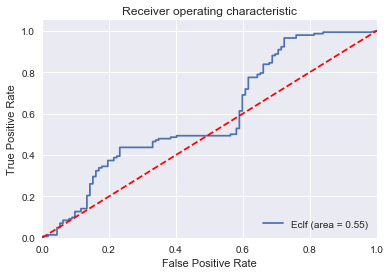

In [144]:
# Obtenemos la Curva Roc

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import (precision_score, recall_score,f1_score,accuracy_score)

eclf = VotingClassifier(estimators=[('Naive Bayes Gaussian', GaussianNB()), ('Naive Bayes Multinomial', MultinomialNB()), 
                                    ('Naive Bayes Bernoulli', BernoulliNB())], voting='soft')
eclf.fit(X_train, y_train)

eclf_roc_auc = roc_auc_score(y_test, eclf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, eclf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Eclf (area = %0.2f)' % eclf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Eclf_ROC')
plt.show()

#### Modelos Supervisados : Ensamble de Modelos 2

In [362]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
eclf2 = VotingClassifier(estimators=[('GBoost', ensemble.GradientBoostingClassifier()),
                                     ('AdaBoost', AdaBoostClassifier()), 
                                    ('Random Forest', RandomForestClassifier())],
                        voting='soft')

eclf2.fit(X_train, y_train) 



VotingClassifier(estimators=[('GBoost', GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf...obs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))],
         flatten_transform=None, n_jobs=None, voting='soft', weights=None)

In [363]:
#Calculamos la clase predicha, para poder evaluar la clasificación
y_pred = eclf2.predict(X_test)

In [364]:
#Atributos
#rf.estimators_ ,classes_  ,max_features_ ,n_classes_ ,n_features_ ,n_outputs_ ,feature_importances_ ,oob_score_  

print("\tAccuracy: %1.3f\n" % accuracy_score(y_test, y_pred))
print("\tPrecision: %1.3f" % precision_score(y_test, y_pred))
print("\tRecall: %1.3f" % recall_score(y_test, y_pred))
print("\tF1: %1.3f\n" % f1_score(y_test, y_pred))

	Accuracy: 0.746

	Precision: 0.774
	Recall: 0.869
	F1: 0.819



In [365]:
# Obtenemos la matriz de confusión con las métricas anteriores
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.51      0.58        63
           1       0.77      0.87      0.82       122

   micro avg       0.75      0.75      0.75       185
   macro avg       0.72      0.69      0.70       185
weighted avg       0.74      0.75      0.74       185



In [297]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

kfold = model_selection.KFold(n_splits=10, random_state=7)
eclf2 = VotingClassifier(estimators=[('AdaBoost', AdaBoostClassifier()), 
                                    ('Random Forest', RandomForestClassifier(max_depth=2, random_state=0))],
                        voting='soft')
scoring = 'accuracy'
results = model_selection.cross_val_score(eclf2, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.702


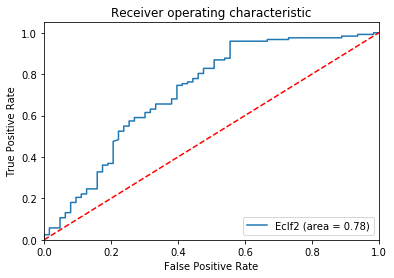

In [298]:
# Obtenemos la Curva Roc

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import (precision_score, recall_score,f1_score,accuracy_score)

eclf2 = VotingClassifier(estimators=[('AdaBoost', AdaBoostClassifier()), 
                                    ('Random Forest', RandomForestClassifier(max_depth=2, random_state=0))],
                        voting='soft')
eclf2.fit(X_train, y_train)

eclf2_roc_auc = roc_auc_score(y_train, eclf2.predict(X_train))
fpr, tpr, thresholds = roc_curve(y_test, eclf2.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Eclf2 (area = %0.2f)' % eclf2_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Eclf2_ROC')
plt.show()

In [299]:
#Utilizamos el datatest para poder utilizarlo en todos los algoritmos
#test_parametrica.head(5)
df2 = test_parametrica.copy()

In [156]:
#Creamos una copia para no perder el dataset de test o validación ya imputado
#df2 = df2.drop('Loan_ID', axis=1) # Le quitamos el ID para poder scorear o puntuar el modelo
y_final = eclf2.predict(df2) # Predecimos sobre nuevos clientes o clientes sin la variable dependiente VD

data = np.hstack((test_parametrica['Loan_ID'].values.reshape(-1,1), y_final.reshape(-1,1)))
df_submmit = pd.DataFrame(data, columns=['Loan_ID','Loan_Status'])
df_submmit['Loan_Status']=["Y" if i == 1 else "N" for i in df_submmit['Loan_Status']]
df_submmit.to_csv('Submmit_Ensamble01.csv', index=False)

#### Modelos Supervisados : Stacking de Modelos

In [366]:
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier

stackclf = VotingClassifier(estimators=[('AdaBoost', AdaBoostClassifier()), 
                                    ('Random Forest', RandomForestClassifier(max_depth=2, random_state=0)),
                                    ('KNN', KNeighborsClassifier(n_neighbors=10))],
                        voting='soft')

stackclf.fit(X_train, y_train) 


VotingClassifier(estimators=[('AdaBoost', AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)), ('Random Forest', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_lea...i',
           metric_params=None, n_jobs=None, n_neighbors=10, p=2,
           weights='uniform'))],
         flatten_transform=None, n_jobs=None, voting='soft', weights=None)

In [302]:
#Calculamos la clase predicha, para poder evaluar la clasificación
y_pred = stackclf.predict(X_test)

In [303]:
#Atributos
#rf.estimators_ ,classes_  ,max_features_ ,n_classes_ ,n_features_ ,n_outputs_ ,feature_importances_ ,oob_score_  

print("\tAccuracy: %1.3f\n" % accuracy_score(y_test, y_pred))
print("\tPrecision: %1.3f" % precision_score(y_test, y_pred))
print("\tRecall: %1.3f" % recall_score(y_test, y_pred))
print("\tF1: %1.3f\n" % f1_score(y_test, y_pred))

	Accuracy: 0.573

	Precision: 0.722
	Recall: 0.574
	F1: 0.639



In [304]:
# Obtenemos la matriz de confusión con las métricas anteriores
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.41      0.57      0.48        63
           1       0.72      0.57      0.64       122

   micro avg       0.57      0.57      0.57       185
   macro avg       0.57      0.57      0.56       185
weighted avg       0.62      0.57      0.58       185



In [306]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

kfold = model_selection.KFold(n_splits=10, random_state=7)
stackclf = VotingClassifier(estimators=[('AdaBoost', AdaBoostClassifier()), 
                                    ('Random Forest', RandomForestClassifier()),
                                    ('KNN', KNeighborsClassifier(n_neighbors=10))],
                        voting='soft')
scoring = 'accuracy'
results = model_selection.cross_val_score(stackclf, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.858


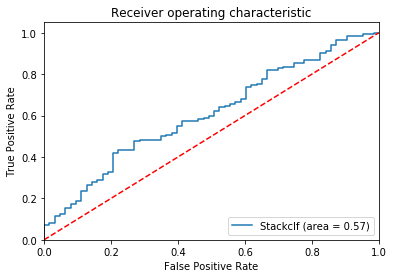

In [307]:
# Obtenemos la Curva Roc

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import (precision_score, recall_score,f1_score,accuracy_score)

stackclf = VotingClassifier(estimators=[('AdaBoost', AdaBoostClassifier()), 
                                    ('Random Forest', RandomForestClassifier(max_depth=2, random_state=0)),
                                    ('KNN', KNeighborsClassifier(n_neighbors=10))],
                        voting='soft')

stackclf.fit(X_train, y_train)

stackclf_roc_auc = roc_auc_score(y_test, stackclf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, stackclf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Stackclf (area = %0.2f)' % stackclf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Stack_ROC')
plt.show()

#### 8 ELECCIÓN DEL MEJOR MODELO

In [367]:
# Selección del mejor Modelo
# Cargamos todos los modelos que necesitamos

import numpy as np
from sklearn.model_selection import cross_val_score
import time
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

In [368]:
kfolds = StratifiedKFold(shuffle=True, random_state=1)

##### Creamos una función para probar todos nuestros modelos

In [369]:
import numpy as np
def run_model(model, X, y):
    model_name = str(model.__class__).split('.')[-1].replace('>','').replace("'",'')
    print(model_name)
    accuracy = []
    f1 = []
    start = int(time.time() * 1000)
    model.fit(X, y)
    y_ = model.predict(X_test)
    accuracy += [accuracy_score(y_test, y_)]
    f1 += [f1_score(y_test, y_)]
    end = int(time.time() * 1000)
    results.loc[len(results)] = [model_name, np.mean(accuracy), np.std(accuracy), 
                                 np.mean(f1), np.std(f1), str(end - start)]

##### Agrupamos Familias de Modelos según nuestro criterio

In [370]:
# stackclf.fit(X_final, y_final) 
def run_linear_models(X, y):
    
    run_model(LogisticRegression(), X_train, y_train)
    run_model(RidgeClassifier(), X_train, y_train)
    run_model(MLPClassifier(max_iter=1000), X_train, y_train)
    
def run_misc_models(X, y):

    run_model(BernoulliNB(), X_train, y_train)
    run_model(KNeighborsClassifier(), X_train, y_train)
    run_model(DecisionTreeClassifier(), X_train, y_train)
    
def run_ensemble_models(X, y):
    run_model(RandomForestClassifier(), X_train, y_train)
    run_model(ExtraTreesClassifier(), X_train, y_train)
    run_model(AdaBoostClassifier(), X_train, y_train)
    run_model(GradientBoostingClassifier(), X_train, y_train)    
    run_model(XGBClassifier(), X_train, y_train)
    run_model(VotingClassifier(estimators=[('AdaBoost', AdaBoostClassifier()), 
                                    ('Random Forest', RandomForestClassifier(max_depth=2, random_state=0)),
                                    ('KNN', KNeighborsClassifier(n_neighbors=10))],
                        voting='soft'), X_train, y_train)

In [371]:
results = pd.DataFrame(columns=['model', 'accuracy', 'accuracy-std', 'f1-score', 'f1-score-std', 'time'])

#### Corremos todas las familias de modelos propuestos

In [372]:
run_linear_models(X, y)
run_misc_models(X, y)
run_ensemble_models(X, y)


LogisticRegression
RidgeClassifier
MLPClassifier
BernoulliNB
KNeighborsClassifier
DecisionTreeClassifier
RandomForestClassifier
ExtraTreesClassifier
AdaBoostClassifier
GradientBoostingClassifier
XGBClassifier
VotingClassifier


#### Tabla de Resultados con todos nuestros modelos

In [373]:
results

,model,accuracy,accuracy-std,f1-score,f1-score-std,time
0,LogisticRegression,0.756757,0.0,0.820717,0.0,8
1,RidgeClassifier,0.751351,0.0,0.821705,0.0,5
2,MLPClassifier,0.362162,0.0,0.078125,0.0,87
3,BernoulliNB,0.562162,0.0,0.643172,0.0,4
4,KNeighborsClassifier,0.524324,0.0,0.596330,0.0,5
5,DecisionTreeClassifier,0.691892,0.0,0.759494,0.0,6
6,RandomForestClassifier,0.724324,0.0,0.801556,0.0,22
7,ExtraTreesClassifier,0.729730,0.0,0.806202,0.0,19
8,AdaBoostClassifier,0.702703,0.0,0.784314,0.0,106
9,GradientBoostingClassifier,0.724324,0.0,0.801556,0.0,91


#### Tabla de Resultados con todos nuestros modelos ordenados por algún criterio

In [374]:
results.iloc[results['accuracy'].sort_values(ascending=False).index].head(19)

,model,accuracy,accuracy-std,f1-score,f1-score-std,time
0,LogisticRegression,0.756757,0.0,0.820717,0.0,8
10,XGBClassifier,0.751351,0.0,0.823077,0.0,59
1,RidgeClassifier,0.751351,0.0,0.821705,0.0,5
7,ExtraTreesClassifier,0.729730,0.0,0.806202,0.0,19
9,GradientBoostingClassifier,0.724324,0.0,0.801556,0.0,91
6,RandomForestClassifier,0.724324,0.0,0.801556,0.0,22
8,AdaBoostClassifier,0.702703,0.0,0.784314,0.0,106
5,DecisionTreeClassifier,0.691892,0.0,0.759494,0.0,6
11,VotingClassifier,0.572973,0.0,0.639269,0.0,87
3,BernoulliNB,0.562162,0.0,0.643172,0.0,4


### Listo!!!! Elegimos el mejor clasificador

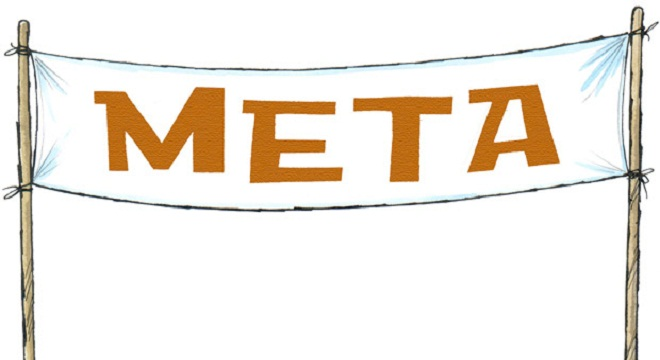